In [114]:
import numpy as np
import seaborn as sns
import time
from resources import *
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## Read data

In [115]:
df = read_csv_data('C:/Users/Admin/Desktop/YCNG235/Project/archive/steam-200k.csv')

In [116]:
df.head()

,user_id,game_title,behavior,value
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0


In [117]:
df_purchase = df.loc[df['behavior'] == "purchase"]

In [118]:
df_purchase.head()

,user_id,game_title,behavior,value
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
2,151603712,Fallout 4,purchase,1.0
4,151603712,Spore,purchase,1.0
6,151603712,Fallout New Vegas,purchase,1.0
8,151603712,Left 4 Dead 2,purchase,1.0


In [119]:
df_play = df.loc[df['behavior'] == "play"]

In [120]:
df_play.head()

,user_id,game_title,behavior,value
1,151603712,The Elder Scrolls V Skyrim,play,273.0
3,151603712,Fallout 4,play,87.0
5,151603712,Spore,play,14.9
7,151603712,Fallout New Vegas,play,12.1
9,151603712,Left 4 Dead 2,play,8.9


In [121]:
logger.info(f'The unique number of games: {df["game_title"].nunique()}')
logger.info(f'The unique number of games purchased: {df_purchase["game_title"].nunique()}')
logger.info(f'The unique number of games played: {df_play["game_title"].nunique()}')

2022-06-15 14:12:53,649 : INFO : The unique number of games: 5155
2022-06-15 14:12:53,664 : INFO : The unique number of games purchased: 5155
2022-06-15 14:12:53,673 : INFO : The unique number of games played: 3600


In [122]:
logger.info(f'Games purchased stats')
df_purchase['game_title'].describe(percentiles=[.25, .5, .75, .95, 1])

2022-06-15 14:12:53,893 : INFO : Games purchased stats


count     129511
unique      5155
top       Dota 2
freq        4841
Name: game_title, dtype: object

In [123]:
logger.info(f'Games played stats')
df_play['game_title'].describe(percentiles=[.25, .5, .75, .95, 1])

2022-06-15 14:12:54,161 : INFO : Games played stats


count      70489
unique      3600
top       Dota 2
freq        4841
Name: game_title, dtype: object

In [124]:
popular_games_purchased_df = df_purchase.groupby(['game_title']).agg({
    'game_title': [('watch_count', 'count')]
})
popular_games_purchased_df.columns = popular_games_purchased_df.columns.droplevel(level=0)
popular_games_purchased_df = popular_games_purchased_df[['watch_count']]
popular_games_purchased_df.reset_index(inplace=True)
popular_games_purchased_df.sort_values(by='watch_count', ascending=False, inplace=True)
logger.info(f'The unique number of games purchased: {popular_games_purchased_df.shape[0]}')
popular_games_purchased_df['watch_count'].describe(percentiles=[.25, .5, .75, .95, .99, .995, 1])

2022-06-15 14:12:54,971 : INFO : The unique number of games purchased: 5155


count    5155.000000
mean       25.123375
std       101.572586
min         1.000000
25%         2.000000
50%         5.000000
75%        18.000000
95%        99.000000
99%       312.920000
99.5%     431.070000
100%     4841.000000
max      4841.000000
Name: watch_count, dtype: float64

In [125]:
popular_games_purchased_df

,game_title,watch_count
1336,Dota 2,4841
4257,Team Fortress 2,2323
4788,Unturned,1563
981,Counter-Strike Global Offensive,1412
2074,Half-Life 2 Lost Coast,981
...,...,...
1574,EverQuest Seeds of Destruction,1
1576,Everlasting Summer DLC One pioneer's story,1
1577,Everyday Genius SquareLogic,1
1579,EvilQuest,1


In [126]:
popular_games_purchased_df.head(10)

,game_title,watch_count
1336,Dota 2,4841
4257,Team Fortress 2,2323
4788,Unturned,1563
981,Counter-Strike Global Offensive,1412
2074,Half-Life 2 Lost Coast,981
984,Counter-Strike Source,978
2475,Left 4 Dead 2,951
978,Counter-Strike,856
4899,Warframe,847
2071,Half-Life 2 Deathmatch,823


<AxesSubplot:xlabel='game_title'>

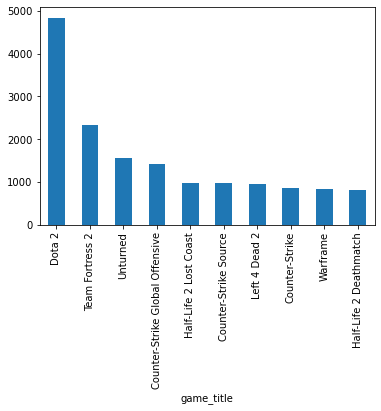

In [127]:
popular_games_purchased_df.head(10).set_index('game_title').watch_count.plot(kind='bar')

In [128]:
import matplotlib

In [129]:
test1 = popular_games_purchased_df.head(10).sort_values('watch_count',ascending=True)

<BarContainer object of 10 artists>

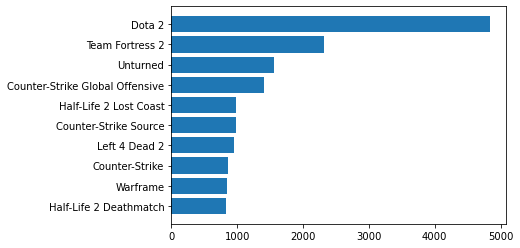

In [130]:
matplotlib.pyplot.barh(test1['game_title'], test1['watch_count'])

In [67]:
mask = popular_games_purchased_df['watch_count'] >= np.percentile(popular_games_purchased_df['watch_count'], 99.5)
rec_game_purchased_df = popular_games_purchased_df[mask]
logger.info(f'The unique number of games: {rec_game_purchased_df.shape[0]}')

2022-06-15 13:53:48,874 : INFO : The unique number of games: 26


In [68]:
rec_game_purchased_df.head(26)

,game_title,watch_count
1336,Dota 2,4841
4257,Team Fortress 2,2323
4788,Unturned,1563
981,Counter-Strike Global Offensive,1412
2074,Half-Life 2 Lost Coast,981
984,Counter-Strike Source,978
2475,Left 4 Dead 2,951
978,Counter-Strike,856
4899,Warframe,847
2071,Half-Life 2 Deathmatch,823


In [69]:
popular_games_played_df = df_play.groupby(['game_title'])['value'].sum().reset_index()

In [70]:
popular_games_played_df.sort_values(by='value', ascending=False, inplace=True)
logger.info(f'The unique number of games played: {popular_games_played_df.shape[0]}')
popular_games_played_df['value'].describe(percentiles=[.25, .5, .75, .95, .99, .995, 1])

2022-06-15 13:54:01,149 : INFO : The unique number of games played: 3600


count      3600.000000
mean        957.046056
std       17930.737469
min           0.100000
25%           3.100000
50%          15.100000
75%          97.575000
95%        1566.390000
99%       10768.540000
99.5%     22669.344000
100%     981684.600000
max      981684.600000
Name: value, dtype: float64

In [72]:
popular_games_played_df.head(10)

,game_title,value
922,Dota 2,981684.6
673,Counter-Strike Global Offensive,322771.6
2994,Team Fortress 2,173673.3
670,Counter-Strike,134261.1
2691,Sid Meier's Civilization V,99821.3
675,Counter-Strike Source,96075.5
3067,The Elder Scrolls V Skyrim,70889.3
1313,Garry's Mod,49725.3
490,Call of Duty Modern Warfare 2 - Multiplayer,42009.9
1733,Left 4 Dead 2,33596.7


<AxesSubplot:xlabel='game_title'>

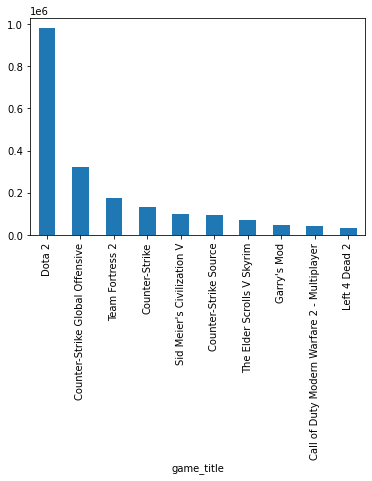

In [74]:
popular_games_played_df.head(10).set_index('game_title').value.plot(kind='bar')

In [75]:
mask = popular_games_played_df['value'] >= np.percentile(popular_games_played_df['value'], 99.5)
rec_game_played_df = popular_games_played_df[mask]
logger.info(f'The unique number of games: {popular_games_played_df.shape[0]}')

2022-06-15 13:54:37,898 : INFO : The unique number of games: 3600


In [76]:
popular_games_played_df.head()

,game_title,value
922,Dota 2,981684.6
673,Counter-Strike Global Offensive,322771.6
2994,Team Fortress 2,173673.3
670,Counter-Strike,134261.1
2691,Sid Meier's Civilization V,99821.3


In [131]:
test2 = popular_games_played_df.head(10).sort_values('value',ascending=True)

<BarContainer object of 10 artists>

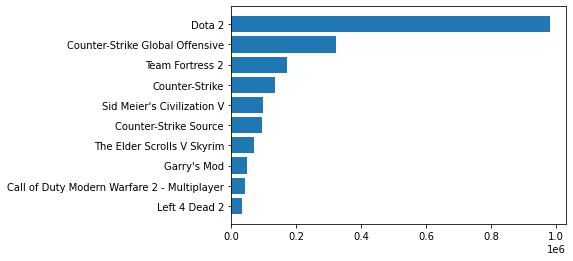

In [132]:
matplotlib.pyplot.barh(test2['game_title'], test2['value'])